In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 
# from scipy.stats import skewb
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
all = pd.concat([train, test],axis=0,join='inner').reset_index(drop = True)

In [13]:
obj = train.loc[:,train.dtypes=="object"].columns

In [4]:
all["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [5]:
for col in ("PoolQC", "MiscFeature", 'GarageType',"Alley", "Fence", "FireplaceQu", "MSSubClass", 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')
    
    
for col in ('GarageArea', 'GarageYrBlt', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea", ):
    train[col] = train[col].fillna(0)
    
    
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional'):
     train[col] =train[col].fillna(train[col].mode()[0])
    
    
from sklearn.preprocessing import LabelEncoder

#以下の特徴量は順序特徴量とみなせる
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street',  'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

#マッピングを実行
for col in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[col].values)) 
    train[col] = lbl.transform(list(train[col].values)) 
    

In [6]:
train = train.drop(["Id","MiscFeature","MoSold","YrSold","Utilities"],axis=1)

In [7]:
train["TotalSF"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"] 
train['YearBuilt'] = 2011 - train['YearBuilt']
train['YearRemodAdd']=2011- train['YearRemodAdd']
train['GarageYrBlt']=2011- train['GarageYrBlt']
train["TotalQual"]=train["TotalSF"] *train['OverallQual']
train["TotalBsmtSFQual"]=train["TotalBsmtSF"] *train['BsmtQual']
train['YearBuilt'][train['YearBuilt']!=train['YearRemodAdd']]=train['YearRemodAdd']
train["Porch"]=train['OpenPorchSF']+train['EnclosedPorch']+train['3SsnPorch']+train['ScreenPorch']
train["Garage"]=train["GarageArea"]*train["GarageQual"]

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [8]:
train = train.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF","TotalSF", "OverallQual","YearRemodAdd",'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1)

In [9]:
train=train[~((train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000))]

In [10]:
# # train["LandSlope"].value_counts()
# sns.jointplot(x="LandSlope", y="SalePrice", data=train)

In [11]:
# # train.loc[:,train.columns.str.contains("Kitchen")].columns
# train.loc[:,['KitchenQual']]

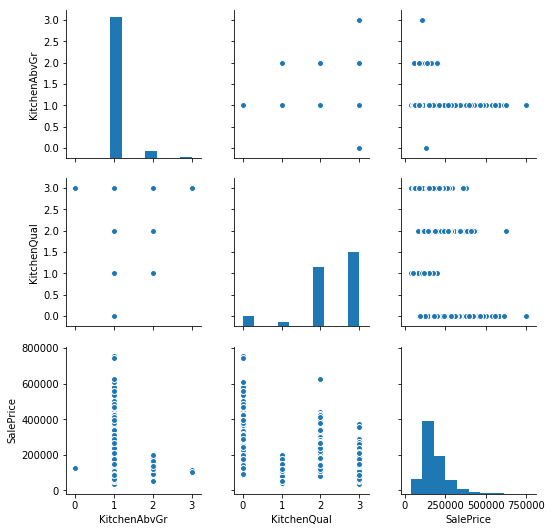

In [12]:
sns.pairplot(train.loc[:,['KitchenAbvGr', 'KitchenQual','SalePrice']])